# `IMAGE CLASSIFICATION USING CNN`

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = (15, 2)

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

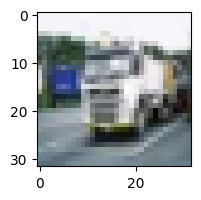

In [ ]:
plt.imshow(X_train[1000])

In [ ]:
y_train[1000]

array([9], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes[y_train[1000]]

'truck'

In [ ]:
def plot_image(x, y, index):
  fig = plt.imshow(x[index])
  plt.title(classes[y[index]])
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

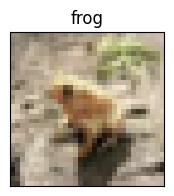

In [ ]:
plot_image(6000)

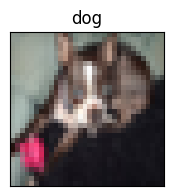

In [ ]:
plot_image(450)

array([[[150, 138, 121],
        [152, 140, 124],
        [139, 127, 111],
        ...,
        [200, 182, 167],
        [206, 187, 172],
        [205, 187, 171]],

       [[142, 130, 114],
        [147, 135, 119],
        [140, 128, 112],
        ...,
        [196, 180, 165],
        [202, 185, 172],
        [208, 192, 180]],

       [[132, 120, 103],
        [144, 132, 116],
        [149, 137, 121],
        ...,
        [194, 182, 158],
        [189, 177, 158],
        [197, 184, 170]],

       ...,

       [[ 44,  37,  30],
        [ 81,  71,  62],
        [187, 174, 163],
        ...,
        [118, 108,  93],
        [146, 136, 121],
        [138, 128, 113]],

       [[ 78,  72,  62],
        [ 97,  87,  75],
        [167, 156, 141],
        ...,
        [187, 176, 158],
        [192, 180, 163],
        [191, 180, 163]],

       [[ 66,  60,  48],
        [ 67,  58,  44],
        [158, 147, 131],
        ...,
        [204, 190, 171],
        [197, 184, 164],
        [190, 177, 157]]], dtype=uint8)
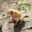

In [ ]:
X_train[6000]

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

#ANN MODEL

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 [==============================] - 21s 39ms/step - loss: 1.8928 - accuracy: 0.3140
Epoch 2/10
500/500 [==============================] - 17s 35ms/step - loss: 1.6781 - accuracy: 0.3970
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 1.5945 - accuracy: 0.4288
Epoch 4/10
500/500 [==============================] - 17s 34ms/step - loss: 1.5280 - accuracy: 0.4540
Epoch 5/10
500/500 [==============================] - 17s 35ms/step - loss: 1.4870 - accuracy: 0.4696
Epoch 6/10
500/500 [==============================] - 17s 33ms/step - loss: 1.4445 - accuracy: 0.4849
Epoch 7/10
500/500 [==============================] - 17s 33ms/step - loss: 1.4184 - accuracy: 0.4949
Epoch 8/10
500/500 [==============================] - 28s 56ms/step - loss: 1.3749 - accuracy: 0.5089
Epoch 9/10
500/500 [==============================] - 27s 53ms/step - loss: 1.3542 - accuracy: 0.5155
Epoch 10/10
500/500 [==============================] - 18s 36ms/step - loss: 1.324

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
accuracy * 100

313/313 [==============================] - 2s 6ms/step - loss: 1.4185 - accuracy: 0.4972


49.720001220703125

# CNN MODEL

In [ ]:
cnn_model = keras.Sequential([
    #CONVOLUTIONAL LAYERS
    keras.layers.Conv2D(filters = 100, kernel_size = (3, 3), input_shape=(32, 32, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters = 50, kernel_size = (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),

     # DENSE LAYERS
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax'),
])

cnn_model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

cnn_model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 100)

Epoch 1/10
500/500 [==============================] - 168s 333ms/step - loss: 1.5884 - accuracy: 0.4167
Epoch 2/10
500/500 [==============================] - 161s 323ms/step - loss: 1.1563 - accuracy: 0.5912
Epoch 3/10
500/500 [==============================] - 156s 311ms/step - loss: 0.9829 - accuracy: 0.6601
Epoch 4/10
500/500 [==============================] - 161s 321ms/step - loss: 0.8493 - accuracy: 0.7081
Epoch 5/10
500/500 [==============================] - 155s 309ms/step - loss: 0.7564 - accuracy: 0.7380
Epoch 6/10
500/500 [==============================] - 155s 310ms/step - loss: 0.6698 - accuracy: 0.7691
Epoch 7/10
500/500 [==============================] - 152s 305ms/step - loss: 0.6041 - accuracy: 0.7922
Epoch 8/10
500/500 [==============================] - 153s 306ms/step - loss: 0.5254 - accuracy: 0.8191
Epoch 9/10
500/500 [==============================] - 153s 307ms/step - loss: 0.4681 - accuracy: 0.8364
Epoch 10/10
500/500 [==============================] - 154s 307m

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test_scaled, y_test)
accuracy * 100

313/313 [==============================] - 17s 54ms/step - loss: 0.8930 - accuracy: 0.7270


72.69999980926514

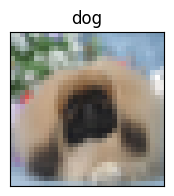

In [ ]:
y_test = y_test.reshape(-1)
plot_image(X_test, y_test, 250)

In [ ]:
pred = cnn_model.predict(X_test)

313/313 [==============================] - 17s 52ms/step


In [ ]:
classes[np.argmax(pred[250])]

'dog'

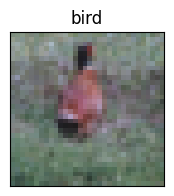

In [ ]:
plot_image(X_test, y_test, 799)

In [ ]:
classes[np.argmax(pred[799])]

'bird'

In [ ]:
pred_value = [np.argmax(value) for value in pred]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_value))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1000
           1       0.63      0.81      0.71      1000
           2       0.75      0.29      0.42      1000
           3       0.45      0.38      0.41      1000
           4       0.78      0.23      0.35      1000
           5       0.51      0.59      0.55      1000
           6       0.87      0.46      0.60      1000
           7       0.50      0.84      0.63      1000
           8       0.64      0.73      0.68      1000
           9       0.58      0.82      0.68      1000

    accuracy                           0.59     10000
   macro avg       0.63      0.59      0.57     10000
weighted avg       0.63      0.59      0.57     10000



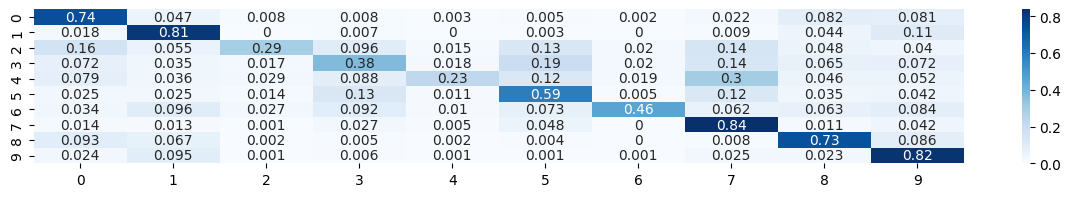

In [ ]:
cf = confusion_matrix(y_test, pred_value, normalize = 'true')
sns.heatmap(cf, cmap = 'Blues', annot = True);